## Introduction

In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!

A comprehensive database of lego blocks is provided by [Rebrickable](https://rebrickable.com/downloads/). The data is available as csv files and the schema is shown below.

<img src='./datasets/lego/lego_schema.png'>

Let us start by reading in the colors data to get a sense of the diversity of lego sets!

In [3]:
import pandas as pd
import numpy as np

colors = pd.read_csv('./datasets/lego/colors.csv')

colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


Now that we have read the colors data, we can start exploring it! Let us start by understanding the number of colors available.

In [9]:
# How many distinct colors are available?
colors.shape[0]

# Another way
colors['name'].unique().size

135

The colors data has a column named is_trans that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.

In [10]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
print(colors_summary)



,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


Another interesting dataset available in this database is the sets data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. 

In [14]:
# Read sets data as `sets`
sets = pd.read_csv("datasets/lego/sets.csv")

sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


Let us use this data to explore how the average number of parts in Lego sets has varied over the years.

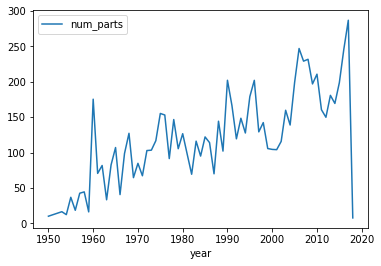

In [16]:
%matplotlib inline

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year', 'num_parts']].groupby('year', as_index = False).mean()

# Plot trends in average number of parts by year
parts_by_year.plot(x = 'year', y='num_parts')

Lego blocks ship under multiple themes. Let us try to get a sense of how the number of themes shipped has varied over the years.

In [22]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index = False).agg({'theme_id': pd.Series.sum})

themes_by_year.head()

,year,theme_id
0,1950,2592
1,1953,1484
2,1954,5196
3,1955,10519
4,1956,4582


Reference: https://projects.datacamp.com/projects/10